In [1]:
import fileinput
import glob
import numpy as np
import h5py as h5
from matplotlib import gridspec
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

gri = ['x','y','z']

def fmt(x):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    if b==0:
        return r'{}'.format(a)
    else:
        return r'{} \times 10^{{{}}}'.format(a, b)

def fmt2(x):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return [r'${}$'.format(a),b]

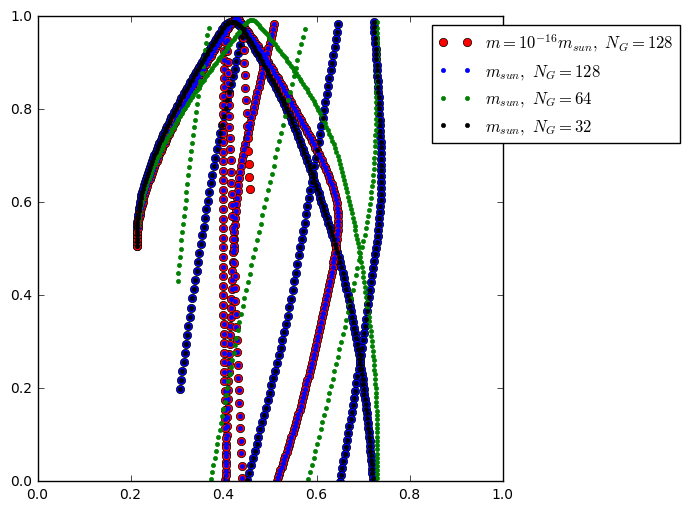

In [74]:
fig = plt.gcf()
fig.set_size_inches(6, 6)

# data = np.loadtxt('pos')[:,:2]
# plt.plot([0.5],[0.5],'o')
plt.plot(data[:,0],data[:,1],'o')

data = np.loadtxt('pos1')[:,:2]
plt.plot(data[:,0],data[:,1],'ro',label=r'$m=10^{-16}m_{sun},\ N_G=128$')

data = np.loadtxt('pos2')[:,:2]
plt.plot(data[:,0],data[:,1],'b.',label=r'$m_{sun},\ N_G=128$')

data = np.loadtxt('pos3')[:,:2]
plt.plot(data[:,0],data[:,1],'g.',label=r'$m_{sun},\ N_G=64$')

data = np.loadtxt('pos4')[:,:2]
plt.plot(data[:,0],data[:,1],'k.',label=r'$m_{sun},\ N_G=32$')

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.legend(bbox_to_anchor=(1.4, 1.))

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
gri = ['x','y','z']

def ratio_plot(ax1,ax2,ax3,ax4,cas,ngh):
    f = h5.File('gev.h5', "r")
    gev = np.array(list(f['data']))
    ngrid = gev.shape[0]

    f = h5.File('ex.h5', "r")
    ex = np.array(list(f['data']))

    f = h5.File('grad_gev.h5', "r")
    g_gev = np.array(list(f['data']))

    f = h5.File('grad_ex.h5', "r")
    g_ex = np.array(list(f['data']))
    
    del(f)

    d = np.absolute((ex[1:-1,1:-1,1:-1]-gev[1:-1,1:-1,1:-1])/ex[1:-1,1:-1,1:-1])
    mean = d.mean()
    
    d = np.absolute((ex[1:-1,1:-1,ngh]-gev[1:-1,1:-1,ngh])/ex[1:-1,1:-1,ngh])
    vmin = np.percentile(d,5)
    vmax = np.percentile(d,95)
    im1 = ax1.imshow(d,vmin=vmin,vmax=vmax)
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", "5%", pad="3%")
    # plt.colorbar(im1, cax=cax1, format=ticker.FuncFormatter(fmt))
    plt.colorbar(im1, cax=cax1)
    ax1.set_title(r'$\delta=|\frac{\phi_{ex}-\phi}{\phi_{ex}}|,\ \bar{\delta}='+"%3.4g"%(mean)+'$',y=1.1,fontsize=18)
    
    grad = 0
    d = np.absolute((g_ex[1:-1,1:-1,1:-1,grad]-g_gev[1:-1,1:-1,1:-1,grad])/g_ex[1:-1,1:-1,1:-1,grad])
    mean = d.mean()
    d = np.absolute((g_ex[1:-1,1:-1,ngh,grad]-g_gev[1:-1,1:-1,ngh,grad])/g_ex[1:-1,1:-1,ngh,grad])
    vmin = np.percentile(d,5)
    vmax = np.percentile(d,95)
    im2 = ax2.imshow(d,vmin=vmin,vmax=vmax)
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(im2, cax=cax2)
    direc = gri[grad]
    ax2.set_title(r'$\delta=|\frac{\nabla_'+direc+r'^{ex}-\nabla_'+direc+r'}{\nabla_'+direc+
                  r'^{ex}}|,\ \bar{\delta}='+"%3.4g"%(mean)+'$',y=1.1,fontsize=18)
    
    grad = 1
    d = np.absolute((g_ex[1:-1,1:-1,1:-1,grad]-g_gev[1:-1,1:-1,1:-1,grad])/g_ex[1:-1,1:-1,1:-1,grad])
    mean = d.mean()
    d = np.absolute((g_ex[1:-1,1:-1,ngh,grad]-g_gev[1:-1,1:-1,ngh,grad])/g_ex[1:-1,1:-1,ngh,grad])
    vmin = np.percentile(d,5)
    vmax = np.percentile(d,95)
    im3 = ax3.imshow(d,vmin=vmin,vmax=vmax)
    divider = make_axes_locatable(ax3)
    cax3 = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(im3, cax=cax3)
    direc = gri[grad]
    ax3.set_title(r'$\delta=|\frac{\nabla_'+direc+r'^{ex}-\nabla_'+direc+r'}{\nabla_'+direc+
                  r'^{ex}}|,\ \bar{\delta}='+"%3.4g"%(mean)+'$',y=1.1,fontsize=18)
    
    grad = 2    
    d = np.absolute((g_ex[1:-1,1:-1,1:-1,grad]-g_gev[1:-1,1:-1,1:-1,grad])/g_ex[1:-1,1:-1,1:-1,grad])
    mean = d.mean()
    d = np.absolute((g_ex[1:-1,1:-1,ngh,grad]-g_gev[1:-1,1:-1,ngh,grad])/g_ex[1:-1,1:-1,ngh,grad])
    vmin = np.percentile(d,5)
    vmax = np.percentile(d,95)
    im4 = ax4.imshow(d,vmin=vmin,vmax=vmax)
    divider = make_axes_locatable(ax4)
    cax4 = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(im4, cax=cax4)
    direc = gri[grad]
    ax4.set_title(r'$\delta=|\frac{\nabla_'+direc+r'^{ex}-\nabla_'+direc+r'}{\nabla_'+direc+
                  r'^{ex}}|,\ \bar{\delta}='+"%3.4g"%(mean)+'$',y=1.1,fontsize=18)

    plt.tight_layout()
    if cas==1:
        plt.suptitle(r'$\phi(r)=1.2\times (x+y+z)$'
                     +'\n'+
                     r'$N_{Grid}='+str(ngrid)+',\ sheet='+str(ngh)+'$',y=0.2,fontsize=18)
    else:
        plt.suptitle(r'$\phi(r)=-\frac{G\times m}{r}$'
                     +'\n'+
                     r'$N_{Grid}='+str(ngrid)+',\ sheet='+str(ngh)+'$',y=0.2,fontsize=18)
    plt.savefig('case'+str(cas)+'_N='+str(ngrid)+'_sh='+str(ngh)+'.jpg',dpi=200)


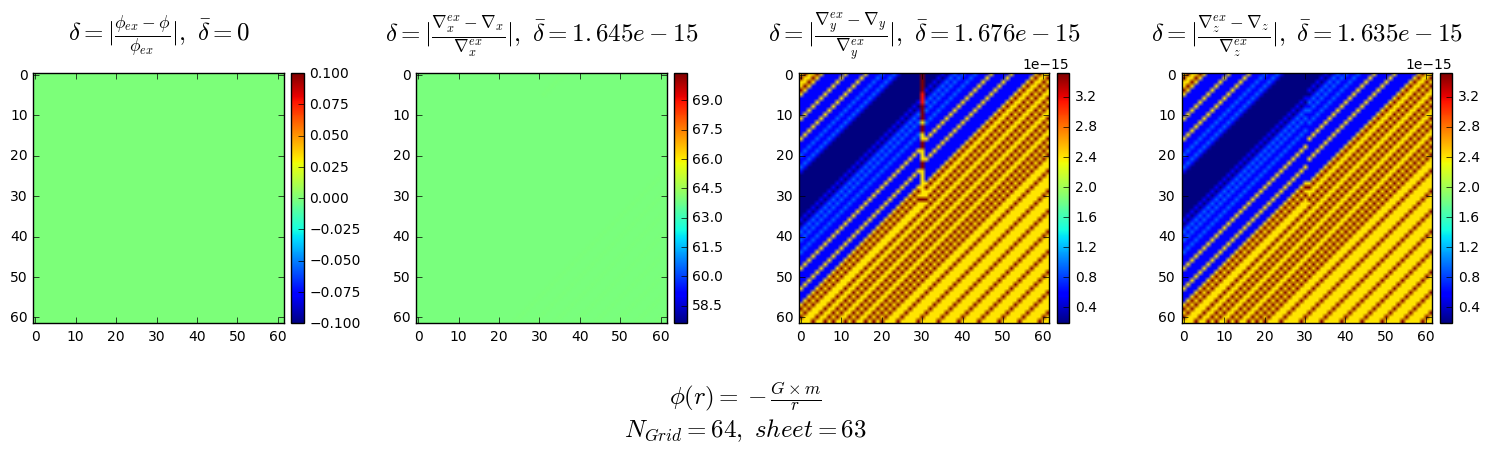

In [7]:
cas = 2
ngh = 63

fig = plt.figure()
gs = gridspec.GridSpec(1,4)
fig.set_size_inches(15, 6)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
ratio_plot(ax1,ax2,ax3,ax4,cas,ngh)

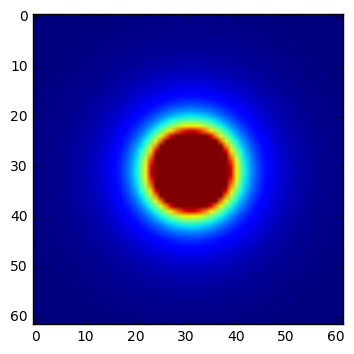

In [23]:
f = h5.File('grad_ex.h5', "r")
g_ex = np.array(list(f['data']))
d = np.absolute(g_ex[1:-1,1:-1,32,0])
vmin = np.percentile(d,5)
vmax = np.percentile(d,95)
plt.imshow(d,vmin=vmin,vmax=vmax)

In [25]:
g_ex[1:-1,1:-1,32,0]

array([[  1.57526288e-09,   1.65334551e-09,   1.73520611e-09, ...,
          1.82089954e-09,   1.73518936e-09,   1.65332952e-09],
       [  1.65334551e-09,   1.73809894e-09,   1.82719614e-09, ...,
          1.92072830e-09,   1.82717788e-09,   1.73808156e-09],
       [  1.73520611e-09,   1.82719614e-09,   1.92417433e-09, ...,
          2.02627760e-09,   1.92415442e-09,   1.82717725e-09],
       ..., 
       [  1.82089954e-09,   1.92072830e-09,   2.02627760e-09, ...,
          2.13774141e-09,   2.02625590e-09,   1.92070777e-09],
       [  1.73518936e-09,   1.82717788e-09,   1.92415442e-09, ...,
          2.02625590e-09,   1.92413452e-09,   1.82715899e-09],
       [  1.65332952e-09,   1.73808156e-09,   1.82717725e-09, ...,
          1.92070777e-09,   1.82715899e-09,   1.73806418e-09]])

In [49]:
f = h5.File('gev.h5', "r")
gev = np.array(list(f['data']))

f = h5.File('ex.h5', "r")
ex = np.array(list(f['data']))

np.sum(np.absolute(ex-gev))/np.sum(ex)
# ex/gev

-1.9536204986297792

In [47]:
f = h5.File('grad_gev.h5', "r")
grad_gev = np.array(list(f['data']))[1:-1,1:-1,1:-1,0]

f = h5.File('grad_ex.h5', "r")
grad_ex = np.array(list(f['data']))[1:-1,1:-1,1:-1,0]

# np.sum(grad_ex-grad_gev)/np.sum(grad_ex)
# (grad_ex-grad_gev)/grad_ex
np.mean(grad_ex-grad_gev)/np.mean(grad_ex)

-1.0246357387955162e-18

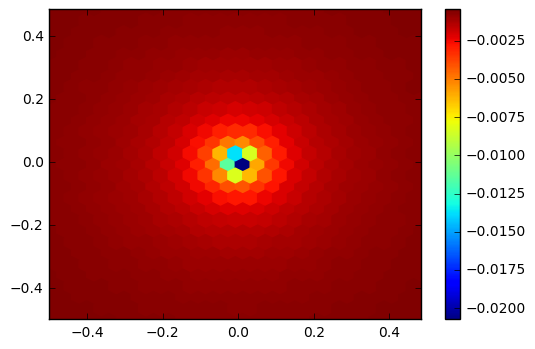

In [33]:
from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

data = np.loadtxt('field')
z0 = np.unique(data[:,2])[16]
data.shape
x = data[data[:,2]==z0][:,0]
y = data[data[:,2]==z0][:,1]
z = data[data[:,2]==z0][:,3]

PLT.hexbin(x, y, C=z, gridsize=25, cmap=CM.jet, bins=None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
PLT.clim(np.min(z)/100000,np.max(z))

PLT.show()   

In [15]:
np.unique(data[:,2]).shape

(64,)

In [12]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import sphviewer as sph

def myplot(x, y, nb=32, xsize=500, ysize=500):   
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)

    x0 = (xmin+xmax)/2.
    y0 = (ymin+ymax)/2.

    pos = np.zeros([3, len(x)])
    pos[0,:] = x
    pos[1,:] = y
    w = np.ones(len(x))

    P = sph.Particles(pos, w, nb=nb)
    S = sph.Scene(P)
    S.update_camera(r='infinity', x=x0, y=y0, z=0, 
                    xsize=xsize, ysize=ysize)
    R = sph.Render(S)
    R.set_logscale()
    img = R.get_image()
    extent = R.get_extent()
    for i, j in zip(xrange(4), [x0,x0,y0,y0]):
        extent[i] += j
    print extent
    return img, extent

fig = plt.figure(1, figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


# Generate some test data
x = np.random.randn(1000)
y = np.random.randn(1000)

#Plotting a regular scatter plot
ax1.plot(x,y,'k.', markersize=5)
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)

heatmap_16, extent_16 = myplot(x,y, nb=16)
heatmap_32, extent_32 = myplot(x,y, nb=32)
heatmap_64, extent_64 = myplot(x,y, nb=64)

ax2.imshow(heatmap_16, extent=extent_16, origin='lower', aspect='auto')
ax2.set_title("Smoothing over 16 neighbors")

ax3.imshow(heatmap_32, extent=extent_32, origin='lower', aspect='auto')
ax3.set_title("Smoothing over 32 neighbors")

#Make the heatmap using a smoothing over 64 neighbors
ax4.imshow(heatmap_64, extent=extent_64, origin='lower', aspect='auto')
ax4.set_title("Smoothing over 64 neighbors")

plt.show()

ImportError: No module named Image

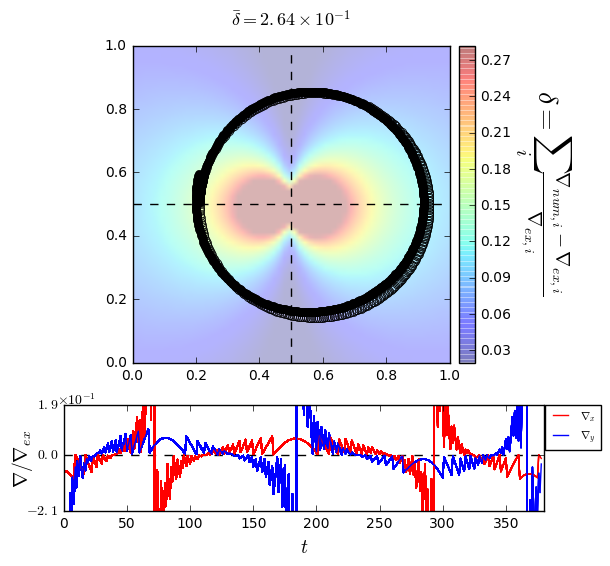

In [113]:
fig = plt.figure()
fig.set_size_inches(6, 6)

gs = gridspec.GridSpec(2, 1,height_ratios=[3,1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

f = h5.File('grad_gev2.h5', "r")
g_gev = np.array(list(f['data']))

f = h5.File('grad_ex.h5', "r")
g_ex = np.array(list(f['data']))

d = np.absolute((g_ex[1:-1,1:-1,1:-1,:]-g_gev[1:-1,1:-1,1:-1,:])/g_ex[1:-1,1:-1,1:-1,:])
mean = 3*d.mean()

ngh = g_gev.shape[0]/2

grad = 0
d = np.absolute((g_ex[1:-1,1:-1,ngh,grad]-g_gev[1:-1,1:-1,ngh,grad])/g_ex[1:-1,1:-1,ngh,grad])
grad = 1
d += np.absolute((g_ex[1:-1,1:-1,ngh,grad]-g_gev[1:-1,1:-1,ngh,grad])/g_ex[1:-1,1:-1,ngh,grad])
grad = 2
d += np.absolute((g_ex[1:-1,1:-1,ngh,grad]-g_gev[1:-1,1:-1,ngh,grad])/g_ex[1:-1,1:-1,ngh,grad])

vmin = np.percentile(d,5)
vmax = np.percentile(d,95)
im1 = ax1.imshow(d,vmin=vmin,vmax=vmax, zorder=0, extent=[0.0,1.0,0.0,1.0], alpha = 0.3)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im1, cax=cax1)
direc = gri[grad]
ax1.set_title(r'$\bar{\delta}='+fmt(mean)+'$',y=1.04,fontsize=13)

pos = np.loadtxt('pos_part_ex')[:,:2]
# pos_num = np.loadtxt('pos_num')
# grads = np.loadtxt('grads')
pos_num = np.loadtxt(fileinput.input(glob.glob("./path/pos_num_*")))
pos_num = pos_num[pos_num[:,1].argsort()][:,2:4]
grads = np.loadtxt(fileinput.input(glob.glob("./grad/grad_*")))
grads = grads[grads[:,1].argsort()][:,2:]

ax1.plot(np.zeros(20)+0.5,np.linspace(0,1,20),'k--',zorder=1)
ax1.plot(np.linspace(0,1,20),np.zeros(20)+0.5,'k--',zorder=1)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.text(1.2,0.75, r'$\delta=\sum_{i} \frac{\nabla_{num,i}-\nabla_{ex,i}}{\nabla_{ex,i}}$', rotation=270, fontsize=20)

n_grd = grads[:,4].shape[0]
ax2.plot(np.zeros(n_grd),'k--')
ax2.set_xlim(0,n_grd)
ax2.set_xlabel(r'$t$', fontsize = 14)

with np.errstate(divide='ignore', invalid='ignore'):
    gmin0 = np.percentile(grads[:,3]/grads[:,0],3)-1
    gmin1 = np.percentile(grads[:,4]/grads[:,1],3)-1
    gmax0 = np.percentile(grads[:,3]/grads[:,0],97)-1
    gmax1 = np.percentile(grads[:,4]/grads[:,1],97)-1
gmin = min(gmin0,gmin1)
gmax = max(gmax0,gmax1)
gmid = 0 #(gmin+gmax)/2.
ax2.set_ylim(gmin,gmax)
y2tcks = [gmin,gmid,gmax]
ax2.set_yticks(y2tcks)
y2tl = [fmt2(x)[0] for x in y2tcks]
ax2.set_yticklabels(y2tl)
ax2.text(-5, 1.01*gmax, r'$\times 10^{'+str(fmt2(x)[1])+'}$', fontsize=10)
ax2.set_ylabel(r'$\nabla/\nabla_{ex}$', fontsize = 14)
ax2.yaxis.set_label_coords(-0.06, 0.5)

gs.update(left=0.1, right=0.9, hspace=0.2)


t_end = 380

for t in range(t_end):
    p_0, = ax1.plot(pos_num[t,0],pos_num[t,1],'ko',zorder=1)
    p_1, = ax1.plot(pos[t,0],pos[t,1],'ko', markerfacecolor='None',zorder=1)
    with np.errstate(divide='ignore', invalid='ignore'):
        p_2, = ax2.plot(grads[:t,3]/grads[:t,0]-1,'r-',label=r'$\nabla_x$')
        p_3, = ax2.plot(grads[:t,4]/grads[:t,1]-1,'b-',label=r'$\nabla_y$')
# ax2.plot(data[:t,5]/data[:t,2],'g-',label=r'$\nabla_z$',zorder=1)
    if (t==0):
        ax2.legend(bbox_to_anchor=(1.13, 1.052), fontsize = 8)





plt.savefig('salam.jpg')
# plt.legend(bbox_to_anchor=(1.4, 1.))